/Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information

id: unique identifier

gender: "Male", "Female" or "Other"

age: age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

ever_married: "No" or "Yes"

work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

Residence_type: "Rural" or "Urban"

avg_glucose_level: average glucose level in blood

bmi: body mass index

smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import missingno as msno
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df=df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
instances = df.shape[0]
features = df.shape[1]-1
output = 1
print(f'Instances: {instances}')
print(f'Features: {features}')
print(f'Output variable: {output}')

Instances: 5110
Features: 10
Output variable: 1


In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Both numerical and categorical variables

Target is stroke

3 categorical variables of type object

In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
y = df['stroke']

In [8]:
strokeY = y.value_counts()[1]
strokeN = y.value_counts()[0]
strokeYP = round(y.value_counts(normalize=True)[1] * 100, 2)
strokeNP = round(y.value_counts(normalize=True)[0] * 100, 2)
ratio = round(strokeN / strokeY, 1)
print(f'Percentage of pacients that had a stroke: {strokeYP}% from {strokeY} patiens')
print(f'Percentage of pacients that did not have a stroke: {strokeNP}% from {strokeN} patiens')
print(f'There are {ratio} times more pacients that did not have a stroke than the ones that had a stroke')

Percentage of pacients that had a stroke: 4.87% from 249 patiens
Percentage of pacients that did not have a stroke: 95.13% from 4861 patiens
There are 19.5 times more pacients that did not have a stroke than the ones that had a stroke


<AxesSubplot:>

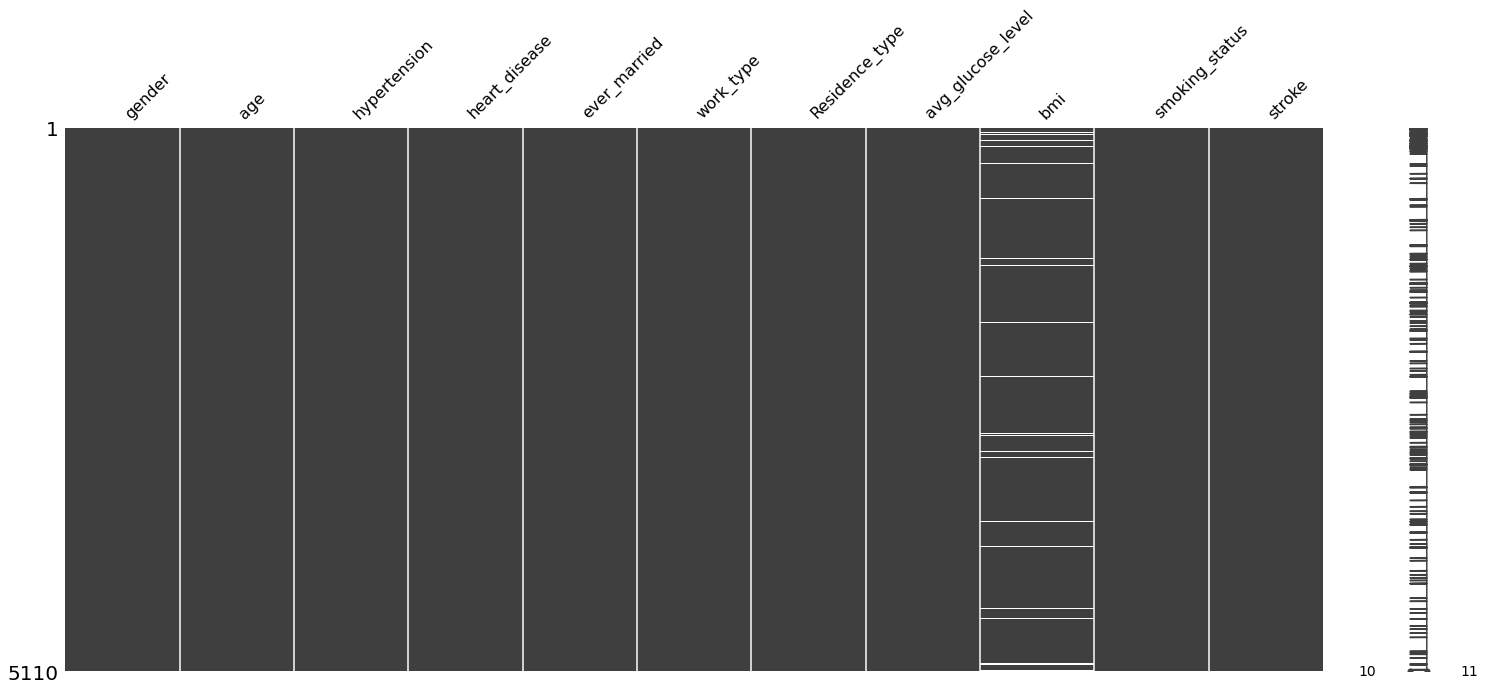

In [9]:
msno.matrix(df)

<AxesSubplot:>

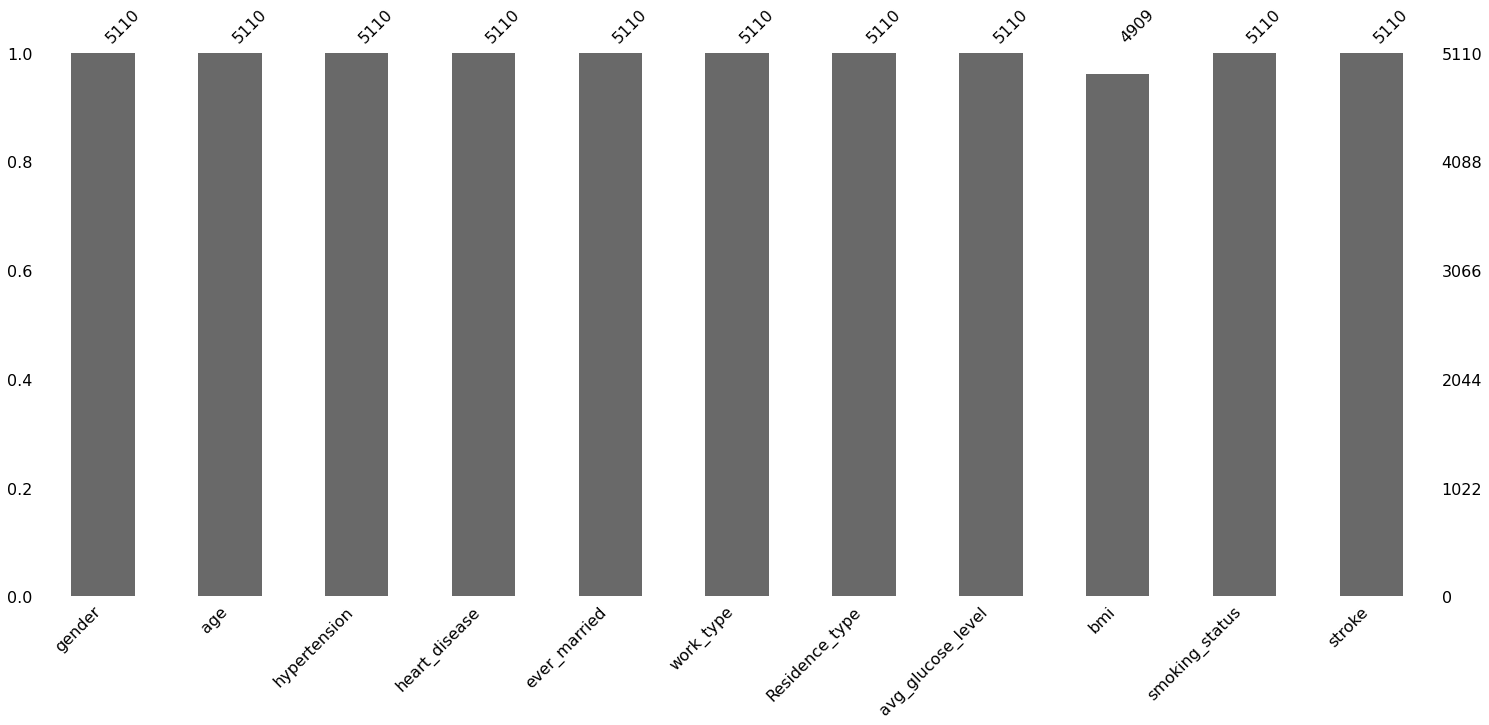

In [10]:
msno.bar(df)

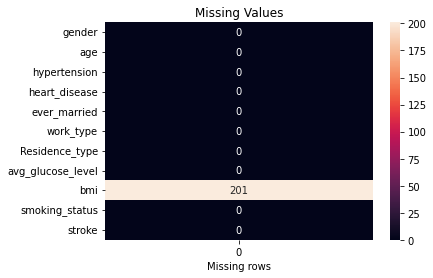

In [11]:
plt.title('Missing Values')
ax = sns.heatmap(df.isna().sum().to_frame(), annot=True, fmt='d')
ax.set_xlabel('Missing rows')
plt.show()

In [12]:
def missingValues(df):
    missingValues = df.isnull()
    missingValuesS = missingValues.sum()
    missingValuesP = (missingValuesS/missingValues.count())
    missingValuesDF = pd.concat([missingValuesS, missingValuesP], axis=1, keys=['MissingSum', 'MissingPercentage']).sort_values('MissingSum', ascending=False)
    print(missingValuesDF)

We have imbalanced data set as one target group (pacients that did nothave stroke) is represented by 95% of all data

In [13]:
missingValues(df)

                   MissingSum  MissingPercentage
bmi                       201           0.039335
gender                      0           0.000000
age                         0           0.000000
hypertension                0           0.000000
heart_disease               0           0.000000
ever_married                0           0.000000
work_type                   0           0.000000
Residence_type              0           0.000000
avg_glucose_level           0           0.000000
smoking_status              0           0.000000
stroke                      0           0.000000


In [14]:

bmiPipe = Pipeline(steps=[('scale',StandardScaler()),
                    ('lr',DecisionTreeRegressor())
                    ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

missingDF = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
bmiPipe.fit(X,Y)
predictedBMI = pd.Series(bmiPipe.predict(missingDF[['age','gender']]),index=missingDF.index)
df.loc[missingDF.index, 'bmi'] = predictedBMI

In [15]:
missingValues(df)

                   MissingSum  MissingPercentage
gender                      0                0.0
age                         0                0.0
hypertension                0                0.0
heart_disease               0                0.0
ever_married                0                0.0
work_type                   0                0.0
Residence_type              0                0.0
avg_glucose_level           0                0.0
bmi                         0                0.0
smoking_status              0                0.0
stroke                      0                0.0


In [16]:
pd.Series({col:df[col].unique() for col in df})

gender                                           [Male, Female, Other]
age                  [67.0, 61.0, 80.0, 49.0, 79.0, 81.0, 74.0, 69....
hypertension                                                    [0, 1]
heart_disease                                                   [1, 0]
ever_married                                                 [Yes, No]
work_type            [Private, Self-employed, Govt_job, children, N...
Residence_type                                          [Urban, Rural]
avg_glucose_level    [228.69, 202.21, 105.92, 171.23, 174.12, 186.2...
bmi                  [36.6, 29.879487179487178, 32.5, 34.4, 24.0, 2...
smoking_status        [formerly smoked, never smoked, smokes, Unknown]
stroke                                                          [1, 0]
dtype: object

In [17]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status']
numerical = ['age','avg_glucose_level', 'bmi']

In [18]:
categDf = df[categorical]
uniqueValuesCateg = pd.Series({col:df[col].unique() for col in categDf})

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

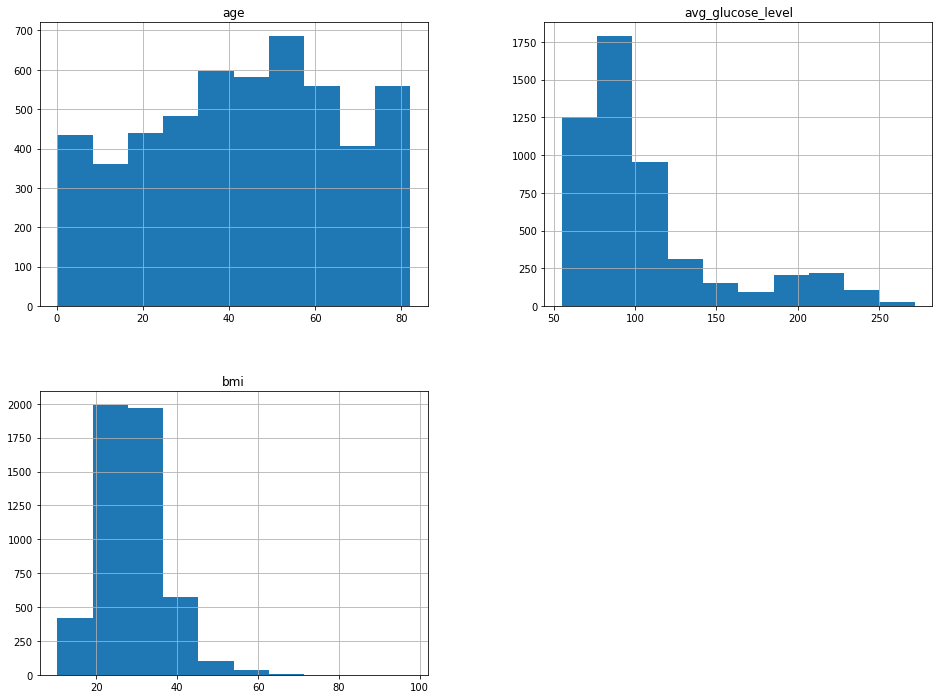

In [19]:
df[numerical].hist(figsize=(16,12))

In [20]:
for column in categDf:
    print (f'{round(df[column].value_counts(normalize=True)*100,2)}')
    fig = px.histogram(df, x=column, title=column, width=500, height=500)
    fig.show()

Female    58.59
Male      41.39
Other      0.02
Name: gender, dtype: float64


0    90.25
1     9.75
Name: hypertension, dtype: float64


0    94.6
1     5.4
Name: heart_disease, dtype: float64


Yes    65.62
No     34.38
Name: ever_married, dtype: float64


Private          57.24
Self-employed    16.03
children         13.44
Govt_job         12.86
Never_worked      0.43
Name: work_type, dtype: float64


Urban    50.8
Rural    49.2
Name: Residence_type, dtype: float64


never smoked       37.03
Unknown            30.22
formerly smoked    17.32
smokes             15.44
Name: smoking_status, dtype: float64


In [21]:
def showRelationshipBetweenNumericalAndCategorical(df, categDf, uniqueValuesCateg, numerical):
    cols = 2
    colors = ['indianred', 'teal', 'blueviolet', 'royalblue', 'forestgreen']

    for column in categDf:
        values = uniqueValuesCateg[column]
        rows = len(values)
        titles = ['']
        specs = [[{"type": "pie", "rowspan": 2}, {"type": "histogram"}]]
        labels = []

        for value in values:
            titles.append(f'<b>Distribution Of {value} {numerical}<b>')
            specs.append([None, {"type": "histogram"}])
            labels.append(f'<b>{value}<b>')

        specs.pop()

        fig = make_subplots(
        rows=rows, 
        cols=cols, 
        subplot_titles=titles,
        specs=specs
        )

        fig.add_trace(
            go.Pie(values=df.gender.value_counts().values, 
                labels=labels,  
                marker_colors=colors[:3],
                hole=0.3,
                pull=[0,0.08,0.3],
                textposition='inside'),
            row=1, 
            col=1
            )

        for index, value in enumerate(values):

            fig.add_trace(
                go.Histogram(
                    x = df[df[column] == value][numerical], 
                    marker={'color': colors[index]},
                    name=f'{value} {numerical}'
                ),
                row=index+1, 
                col=2
                )


        fig.update_layout(
            height=400*rows,
            showlegend=True,
            title_text=f"<b>{numerical}-{column} Infrence<b>",
            )

        fig.show()

In [22]:
for num in numerical:
    showRelationshipBetweenNumericalAndCategorical(df, categDf, uniqueValuesCateg, num)

Text(-1, 0.09, 'No clean relationship between bmi and stroke')

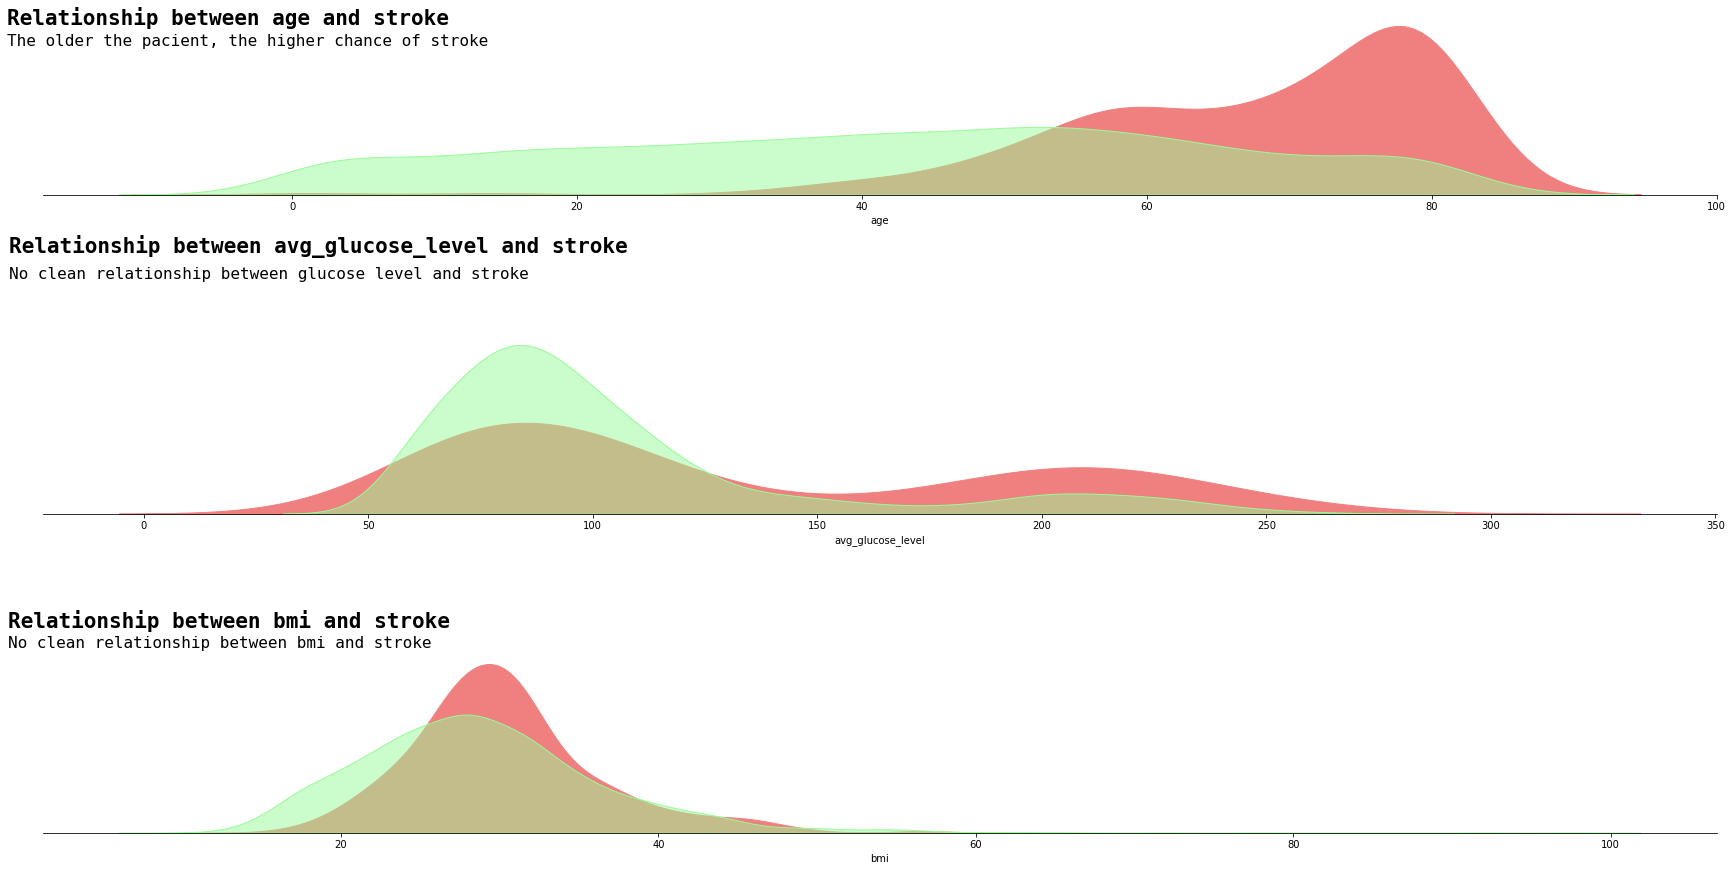

In [23]:
nbNumerical = len(numerical)
fig = plt.figure(figsize=(30, 15), facecolor='white')

ax = [None for i in range(nbNumerical)]
gs = fig.add_gridspec(nbNumerical, 1)
gs.update(wspace=0, hspace=0.8)
textCoordinates = []

for i in range(nbNumerical):

    ax[i]=fig.add_subplot(gs[i,0])
    

    sns.kdeplot(data=df[df.stroke==1], x=numerical[i], ax=ax[i], shade=True, color='lightcoral', alpha=1)
    sns.kdeplot(data=df[df.stroke==0], x=numerical[i], ax=ax[i], shade=True, color='palegreen', alpha=0.5)


    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

ax[0].text(-20, 0.04, f'Relationship between {numerical[0]} and stroke', fontsize=21, fontweight='bold', fontfamily='monospace')
ax[0].text(-20,0.035,'The older the pacient, the higher chance of stroke',fontsize=16,fontweight='light', fontfamily='monospace')
ax[1].text(-30, 0.025, f'Relationship between {numerical[1]} and stroke', fontsize=21, fontweight='bold', fontfamily='monospace')
ax[1].text(-30,0.0225,'No clean relationship between glucose level and stroke',fontsize=16,fontweight='light', fontfamily='monospace')
ax[2].text(-1, 0.1, f'Relationship between {numerical[2]} and stroke', fontsize=21, fontweight='bold', fontfamily='monospace')
ax[2].text(-1 ,0.09,'No clean relationship between bmi and stroke',fontsize=16,fontweight='light', fontfamily='monospace')

In [24]:
def showRelationshipBetweenTargetAndCategorical(df, categDf, uniqueValuesCateg):

    for column in categDf:
        values = uniqueValuesCateg[column]
        for value in values:
            probability = round(df[df[column]==value]["stroke"].mean()*100,2)
            print(f'A pacient with {value} as of value of {column} has {probability}% chance of stroke')

        fig = px.histogram(df, x=column, color="stroke",width=500, height=500)
        fig.show()

In [26]:
showRelationshipBetweenTargetAndCategorical(df, categDf, uniqueValuesCateg)

A pacient with Male as of value of gender has 5.11% chance of stroke
A pacient with Female as of value of gender has 4.71% chance of stroke
A pacient with Other as of value of gender has 0.0% chance of stroke


A pacient with 0 as of value of hypertension has 3.97% chance of stroke
A pacient with 1 as of value of hypertension has 13.25% chance of stroke


A pacient with 1 as of value of heart_disease has 17.03% chance of stroke
A pacient with 0 as of value of heart_disease has 4.18% chance of stroke


A pacient with Yes as of value of ever_married has 6.56% chance of stroke
A pacient with No as of value of ever_married has 1.65% chance of stroke


A pacient with Private as of value of work_type has 5.09% chance of stroke
A pacient with Self-employed as of value of work_type has 7.94% chance of stroke
A pacient with Govt_job as of value of work_type has 5.02% chance of stroke
A pacient with children as of value of work_type has 0.29% chance of stroke
A pacient with Never_worked as of value of work_type has 0.0% chance of stroke


A pacient with Urban as of value of Residence_type has 5.2% chance of stroke
A pacient with Rural as of value of Residence_type has 4.53% chance of stroke


A pacient with formerly smoked as of value of smoking_status has 7.91% chance of stroke
A pacient with never smoked as of value of smoking_status has 4.76% chance of stroke
A pacient with smokes as of value of smoking_status has 5.32% chance of stroke
A pacient with Unknown as of value of smoking_status has 3.04% chance of stroke
